# Student ID, name of each team member

無敵的吧

110065536 陳俊元

110062645 王昱文

107021115 錢珈鋒

# Pick 5 descriptions from testing data and generate 5 images with different noise  z  respectively.

```
this white and purple flower has fragile petals and soft stamens 

this flower has 4 leaves three are purple and yellow with lines and one is solid purple 

this flower is bright pink with overlapping petals and a lime green pistil 

the flower is red in color with a long pedicel with leaves on it 


this flower has a lot of tall orange petals and a lot of brown anthers
```



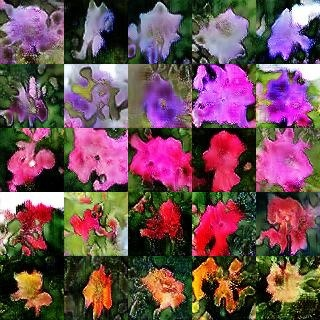

In [3]:
from IPython.display import Image
Image(filename='/home/yuan65536/DL-hw/kaggle03/samples/result.jpg') 

# Models you tried during competition. Briefly describe the main idea of the model and the reason you chose that model.

### Data preprocess & Dataset

    基本上都是照著助教給的code執行，並沒有特別需要說明的部分

### Text Encoder
    提到textencoder自然就想到利用之前老師提到的RNN等等的text encoder將文字轉換成embedding，但是實作起來還是有點麻煩，後來多google了之後發現有tensorflow內建的sentence encoder

    直接import tensorflow提供的universal sentence encoder幫助我們將句子變成embedding
    
    然而這邊有點矛盾，因為這個encoder出來的照片沒有原本RNN架構的圖片漂亮，但是這個universal sentence encoder的分數卻比較高，應該有更好的改進方式，但我們決定利用kaggle的分數為主來選擇使用的encoder，也有想用過其他的encoder，但是這個USC的架構最好使用，就決定使用這個encoder為主了

### Generator

    最一開始用助教前面的GAN來做嘗試同時也有用WGAN和改良後的WGAN來製作，但是產生出來的圖片醜到我們不敢用不過確定可以不管是generator還是算loss的時候都是正常的，我們就開始嘗試其他model，主要的model就是使用Stack GAN的架構，但我們只有使用一個stage



    在generator 的部分都是先接 fc 再經過四次的 upsampling，可以透過 Conv2D + Upsampling2D 達到。 有試著在第一次的Upsampling後多加三層Conv2D得到比較深層的feature，再將淺層和深層(第一層Upsampling完的結果)的feature合併在一起，試圖能看到比較兼具完整性和細節的圖片， 但圖片看起來還是還好，不過上傳的分數還可以。
   
    基本上我們就是按照原本stackGAN的架構，原本先用FC、經過upsampling再加幾層conv2D來得到深層的feature。主要就是把embedding加上noise處理完之後經過upsampling再繼續往下丟，接著再亂試，把upsample出來的feature和深淺層互相合併一下，看看可不可以產生出比較好的圖片，不過最後試起來好像都差不多，感覺圖片好像都不錯，我們就保持原來的架構了，基本上如果把完整的2stage都做出來分數應該可以更高，不過遇到一些技術問題所以就沒有實作

### Discriminator

    先將圖片經過conv得到feature map再將這個feature map經過額外的Conv來達到淺層和深層的feature合成，再將得到的結果和我們得到的text embedding合併，最後判斷這張圖片的真偽。

# List the experiment you did. For example, data augmentation, hyper-parameters tuning, architecture tuning, optimizer tuning, and so on.

    Data augmentation的部份我們做了之後發現效果好像沒什麼差，反而讓training變久後來就沒做了

    也有做助教給的tips裡面的改Z的分布，效果變得不錯

    接著我們就對於各種Generator和Discriminator的Conv layer各種改變深度廣度，但發現好像沒有特別的差別，我們同時也發現以往lab中將Generator和Discriminator以1:5的比例去進行更新效果更好

# Anything worth mentioning. For example, how to pre-train the model.

    我們覺得最為尷尬的地方是比起前兩次competition，我們可以藉由valid error去決定要上傳哪個csv檔，但這次的GAN卻比較尷尬，因為只能用肉眼看圖片品質不錯且generator loss低但其實他的loss也不代表甚麼，幾乎都在瞎猜，train完幾個epoch就憑感覺restore一些check point再做inference，這樣感覺非常不精準，有些時候圖片看起來比較棒但分數低，有些則相反。取得平衡的方式應該有更科學的方法，但我們沒有想到。

    基本上我們架構架好之後，特別是有發現多考慮了true img wrong text的情況整體就改善很多了
